# Homework 3 - Text Scraping

On github I found a data set related to motocross and supercross races that have taken place in the last 3 years.
I was interested to see if there was an advantage to riding a certain brand of motorcycle at this particular track. I also wanted to see if the riders performed similar or worse in the second moto of the day due to fatigue or other factors.

# DATA WRANGLING

In [35]:
# importing tools to python notebook

from IPython.display import HTML
import numpy as np
import requests
import bs4 # this is beautiful soup

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt

In [36]:
# Pulling in the raw data for both motos of the 450 class of the 2018 race at Spring Creek MX Park

rawdata = requests.get('https://api.promotocrossapi.com/laptimes/18/SPRING-CREEK-MX-PARK/450')
moto = rawdata.json()
print(moto)

{'data': [{'series': 'LUCAS OIL AMA PRO MOTOCROSS', 'race': 'SPRING CREEK NATIONAL', 'date': 'JULY 21, 2018', 'round': 8, 'location': 'MILLVILLE, MN', 'track': 'SPRING-CREEK-MX-PARK', 'classMoto': '450_1', 'racedata6': 'B', 'class': 450, 'riderData': [{'1': '--.---', '2': '2.16.779', '3': '2.12.690', '4': '2.14.715', '5': '2.15.169', '6': '2.16.267', '7': '2.16.140', '8': '2.17.489', '9': '2.18.480', '10': '2.20.931', '11': '2.20.261', '12': '2.17.676', '13': '2.17.656', '14': '2.18.223', '15': '2.20.261', '16': '2.22.345', 'bike': 'KAW', 'number': '#1', 'name': 'E. Tomac'}, {'1': '--.---', '2': '2.22.381', '3': '2.21.935', '4': '2.21.271', '5': '2.20.290', '6': '2.19.329', '7': '2.19.420', '8': '2.19.868', '9': '2.22.432', '10': '2.21.519', '11': '2.22.518', '12': '2.23.309', '13': '2.21.885', '14': '2.22.591', '15': '2.23.820', '16': '2.20.371', 'bike': 'YAM', 'number': '#2', 'name': 'C. Webb'}, {'1': '--.---', '2': '2.16.957', '3': '2.15.201', '4': '2.16.011', '5': '2.16.455', '6': 

In [37]:
# Printing all of the data for the first moto and first rider

moto['data'][0]['riderData'][0]

{'1': '--.---',
 '2': '2.16.779',
 '3': '2.12.690',
 '4': '2.14.715',
 '5': '2.15.169',
 '6': '2.16.267',
 '7': '2.16.140',
 '8': '2.17.489',
 '9': '2.18.480',
 '10': '2.20.931',
 '11': '2.20.261',
 '12': '2.17.676',
 '13': '2.17.656',
 '14': '2.18.223',
 '15': '2.20.261',
 '16': '2.22.345',
 'bike': 'KAW',
 'number': '#1',
 'name': 'E. Tomac'}

In [38]:
# Printing all of the keys that are within the first set of Rider Data

moto['data'][0]['riderData'][0].keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', 'bike', 'number', 'name'])

In [39]:
# Printing another set of rider to show that not all data sets are the same

moto['data'][0]['riderData'][35].keys()

dict_keys(['1', '2', '3', '4', '5', 'number', 'name', 'bike'])

In [40]:
# This loop is appending the moto .json file for an unknown variable in the data called 'B'

races = len(moto['data'])

for i in range(0,races):

    riders = len(moto['data'][i]['riderData'])

    for j in range(0,riders):
        
        if 'B' in moto['data'][i]['riderData'][j]:
        
            del moto['data'][i]['riderData'][j]['B']

In [41]:
# A nested loop to pull of the pertinant information out of the .json file and writing it to a .csv file

file = open('Millville_Moto_Cleaned.csv','w')

file.write("Rider,Number,Bike_Brand,Moto_Number,Laps_Completed,Lap_2_Time,Lap_3_Time,Lap_4_Time,Lap_5 _Time,Lap_6_Time,Lap_7_Time,Lap_8_Time,Lap_9_Time,Lap_10_Time,Lap_11_Time,Lap_12_Time,Lap_13_Time,Lap_14_Time,Lap_15_Time,Lap_16_Time,Total_Race_Time\n")

moto_length = 16 # This variable must be changed on a race to race basis

races = len(moto['data'])

for i in range(0,races):

    riders = len(moto['data'][i]['riderData'])

    for j in range(0,riders):
        
        laps_completed = len(moto['data'][i]['riderData'][j]) - 3
        
        file.write(moto['data'][i]['riderData'][j]['name'] + ", ") # writing rider name
        file.write(moto['data'][i]['riderData'][j]['number'] + ", ") # writing rider number
        file.write(moto['data'][i]['riderData'][j]['bike'] + ", ") # writing rider bike brand
        file.write((str(i+1)) + ", ") # writing the moto number
        file.write(str(laps_completed) + ", ") # writing rider bike brand
        
        total_time = 0
        
        for k in range(2,moto_length + 1):
            
            index = str(k)
                      
            if index in moto['data'][i]['riderData'][j].keys(): 
                
                x = moto['data'][i]['riderData'][j][index] # Pulling the lap time from the file
                a,b,c = x.split('.') # Parsing the time format into minutes and seconds
            
                a = int(a)
                b = int(b)
            
                time_sec = 60*a + b # Calculating the lap times
                
                total_time = total_time + time_sec # Calculating the total lap times
                
                file.write(str(time_sec) + ", ")
            
            else:
                file.write(str(0) + ", ")
            
            if k == moto_length:
            
                file.write(str(total_time) + "\n")
                
file.close()

In [42]:
# Loading the .csv file that we just created to use for statistical methods

motocleaned = pd.read_csv('Millville_Moto_Cleaned.csv')
motocleaned.head()

,Rider,Number,Bike_Brand,Moto_Number,Laps_Completed,Lap_2_Time,Lap_3_Time,Lap_4_Time,Lap_5 _Time,Lap_6_Time,...,Lap_8_Time,Lap_9_Time,Lap_10_Time,Lap_11_Time,Lap_12_Time,Lap_13_Time,Lap_14_Time,Lap_15_Time,Lap_16_Time,Total_Race_Time
0,E. Tomac,#1,KAW,1,16,136,132,134,135,136,...,137,138,140,140,137,137,138,140,142,2058
1,C. Webb,#2,YAM,1,16,142,141,141,140,139,...,139,142,141,142,143,141,142,143,140,2115
2,B. Baggett,#4,KTM,1,16,136,135,136,136,137,...,137,138,140,141,141,139,140,143,143,2079
3,J. Bogle,#19,SUZ,1,16,141,144,142,144,145,...,147,149,149,147,145,146,146,147,152,2188
4,M. Musquin,#25,KTM,1,16,136,135,135,135,154,...,138,140,139,140,142,144,143,143,147,2112


# DATA ANALYSIS

Brand Analysis

In [43]:
brand_array = pd.DataFrame()

brand_array = motocleaned[['Bike_Brand','Laps_Completed','Total_Race_Time']]
brand_array.head()

,Bike_Brand,Laps_Completed,Total_Race_Time
0,KAW,16,2058
1,YAM,16,2115
2,KTM,16,2079
3,SUZ,16,2188
4,KTM,16,2112


In [44]:
brand_array['AVG_Lap_Time'] = brand_array['Total_Race_Time'] / brand_array['Laps_Completed']
brand_array.head()

C:\Users\abe_blaylock\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Bike_Brand,Laps_Completed,Total_Race_Time,AVG_Lap_Time
0,KAW,16,2058,128.6250
1,YAM,16,2115,132.1875
2,KTM,16,2079,129.9375
3,SUZ,16,2188,136.7500
4,KTM,16,2112,132.0000


In [45]:
grouped_brand = brand_array.groupby('Bike_Brand').mean()
grouped_brand = grouped_brand.sort_values(by=['AVG_Lap_Time'])
total_mean = grouped_brand['AVG_Lap_Time'].mean()
grouped_brand

,Laps_Completed,Total_Race_Time,AVG_Lap_Time
Bike_Brand,,,
SUZ,15.600000,2128.000000,136.505000
YAM,14.823529,2037.764706,137.664846
KAW,15.400000,2119.400000,137.860000
KTM,15.375000,2118.562500,137.932031
HON,14.125000,1972.250000,139.336624
HUS,14.833333,2123.500000,143.598115


Based on the table above it appears the Suzuki motorcycles had on average the fastest lap times of the day and Husqvarna had the the slowest lap times of the day.

# DATA ANALYSIS

Rider Analysis

In [46]:
rider_array_1 = motocleaned[motocleaned['Moto_Number'] == 1]
rider_array_2 = motocleaned[motocleaned['Moto_Number'] == 2]
rider_array_2.head()

,Rider,Number,Bike_Brand,Moto_Number,Laps_Completed,Lap_2_Time,Lap_3_Time,Lap_4_Time,Lap_5 _Time,Lap_6_Time,...,Lap_8_Time,Lap_9_Time,Lap_10_Time,Lap_11_Time,Lap_12_Time,Lap_13_Time,Lap_14_Time,Lap_15_Time,Lap_16_Time,Total_Race_Time
40,E. Tomac,#1,KAW,2,16,141,137,136,135,134,...,137,140,140,137,139,137,136,137,140,2062
41,C. Webb,#2,YAM,2,16,145,143,142,143,142,...,144,144,146,146,143,144,146,144,146,2160
42,B. Baggett,#4,KTM,2,16,141,141,138,136,138,...,138,141,142,143,142,141,142,143,147,2112
43,J. Bogle,#19,SUZ,2,15,145,149,150,146,145,...,145,146,147,148,146,147,150,161,0,2070
44,M. Musquin,#25,KTM,2,16,139,137,136,135,136,...,138,139,139,138,139,139,140,139,143,2073


In [47]:
rider_array_1['AVG_Lap_Time'] = rider_array_1['Total_Race_Time'] / rider_array_1['Laps_Completed']
rider_array_2['AVG_Lap_Time'] = rider_array_2['Total_Race_Time'] / rider_array_2['Laps_Completed']
rider_array_1.head()

C:\Users\abe_blaylock\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\abe_blaylock\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rider,Number,Bike_Brand,Moto_Number,Laps_Completed,Lap_2_Time,Lap_3_Time,Lap_4_Time,Lap_5 _Time,Lap_6_Time,...,Lap_9_Time,Lap_10_Time,Lap_11_Time,Lap_12_Time,Lap_13_Time,Lap_14_Time,Lap_15_Time,Lap_16_Time,Total_Race_Time,AVG_Lap_Time
0,E. Tomac,#1,KAW,1,16,136,132,134,135,136,...,138,140,140,137,137,138,140,142,2058,128.6250
1,C. Webb,#2,YAM,1,16,142,141,141,140,139,...,142,141,142,143,141,142,143,140,2115,132.1875
2,B. Baggett,#4,KTM,1,16,136,135,136,136,137,...,138,140,141,141,139,140,143,143,2079,129.9375
3,J. Bogle,#19,SUZ,1,16,141,144,142,144,145,...,149,149,147,145,146,146,147,152,2188,136.7500
4,M. Musquin,#25,KTM,1,16,136,135,135,135,154,...,140,139,140,142,144,143,143,147,2112,132.0000


In [48]:
riders_merged = pd.merge(left=rider_array_1,right=rider_array_2,how='left',on=['Rider','Rider'])
riders_merged.head()

,Rider,Number_x,Bike_Brand_x,Moto_Number_x,Laps_Completed_x,Lap_2_Time_x,Lap_3_Time_x,Lap_4_Time_x,Lap_5 _Time_x,Lap_6_Time_x,...,Lap_9_Time_y,Lap_10_Time_y,Lap_11_Time_y,Lap_12_Time_y,Lap_13_Time_y,Lap_14_Time_y,Lap_15_Time_y,Lap_16_Time_y,Total_Race_Time_y,AVG_Lap_Time_y
0,E. Tomac,#1,KAW,1,16,136,132,134,135,136,...,140.0,140.0,137.0,139.0,137.0,136.0,137.0,140.0,2062.0,128.8750
1,C. Webb,#2,YAM,1,16,142,141,141,140,139,...,144.0,146.0,146.0,143.0,144.0,146.0,144.0,146.0,2160.0,135.0000
2,B. Baggett,#4,KTM,1,16,136,135,136,136,137,...,141.0,142.0,143.0,142.0,141.0,142.0,143.0,147.0,2112.0,132.0000
3,J. Bogle,#19,SUZ,1,16,141,144,142,144,145,...,146.0,147.0,148.0,146.0,147.0,150.0,161.0,0.0,2070.0,138.0000
4,M. Musquin,#25,KTM,1,16,136,135,135,135,154,...,139.0,139.0,138.0,139.0,139.0,140.0,139.0,143.0,2073.0,129.5625


In [49]:
rider_data = riders_merged[['Rider','Moto_Number_x','AVG_Lap_Time_x','Moto_Number_y','AVG_Lap_Time_y']]
rider_data['Difference'] = rider_data['AVG_Lap_Time_x'] - rider_data['AVG_Lap_Time_y']
rider_data.head()

C:\Users\abe_blaylock\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rider,Moto_Number_x,AVG_Lap_Time_x,Moto_Number_y,AVG_Lap_Time_y,Difference
0,E. Tomac,1,128.6250,2.0,128.8750,-0.2500
1,C. Webb,1,132.1875,2.0,135.0000,-2.8125
2,B. Baggett,1,129.9375,2.0,132.0000,-2.0625
3,J. Bogle,1,136.7500,2.0,138.0000,-1.2500
4,M. Musquin,1,132.0000,2.0,129.5625,2.4375


In [50]:
mean_diff = rider_data['Difference'].mean()
mean_diff

-2.456683375104427

<function matplotlib.pyplot.show(*args, **kw)>

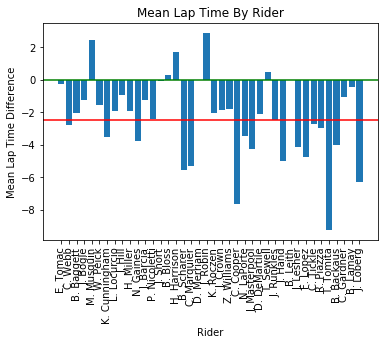

In [51]:
# Plotting bra graph of average lap time
time_diff = rider_data['Difference']
rider = rider_data['Rider']
index = np.arange(len(rider))

plt.bar(rider,time_diff)
plt.xlabel('Rider')
plt.ylabel('Mean Lap Time Difference')
plt.xticks(index,rotation=90)
plt.title('Mean Lap Time By Rider')
plt.axhline(mean_diff, color='red')
plt.axhline(0, color='green')
plt.show

Based on the above value and table, the riders were on average 2.5 seconds slower in the second moto than in the first.